In [1]:
#some code borrowed from: https://medium.com/luca-chuangs-bapm-notes/build-a-neural-network-in-python-binary-classification-49596d7dcabf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import seaborn as sns

In [2]:
df1 = pd.read_csv('input.csv')
df1

,y-size,y-local
0,4,-4.432020
1,4,-0.823644
2,3,2.679860
3,2,8.082810
4,5,-7.372460
...,...,...
10766,6,-6.638660
10767,4,2.772940
10768,5,-6.410430
10769,2,7.980590


In [3]:
df2 = pd.read_csv('labels.csv')
df2

,pt
0,1
1,1
2,1
3,1
4,1
...,...
10766,0
10767,0
10768,0
10769,0


In [4]:
df3 = pd.read_csv('inputTesthisto.csv')
df4 = pd. read_csv('labelsTesthisto.csv')

In [5]:
X_train = df1.values
X_test = df3.values

y_train = df2.values
y_test = df4.values
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(10771, 2) (2693, 2) (10771, 1) (2693, 1)


In [6]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [8]:
model = Sequential()
model.add(Dense(16, input_shape=(2,), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, 
                    batch_size=64,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80


2022-06-15 08:59:20.832545: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


135/135 [==============================] - 1s 2ms/step - loss: 0.6387 - accuracy: 0.6733 - val_loss: 0.6017 - val_accuracy: 0.6947
Epoch 2/80
135/135 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7003 - val_loss: 0.5874 - val_accuracy: 0.7021
Epoch 3/80
135/135 [==============================] - 0s 1ms/step - loss: 0.5868 - accuracy: 0.7010 - val_loss: 0.5850 - val_accuracy: 0.6956
Epoch 4/80
135/135 [==============================] - 0s 860us/step - loss: 0.5839 - accuracy: 0.6994 - val_loss: 0.5843 - val_accuracy: 0.7007
Epoch 5/80
135/135 [==============================] - 0s 903us/step - loss: 0.5830 - accuracy: 0.7002 - val_loss: 0.5826 - val_accuracy: 0.6979
Epoch 6/80
135/135 [==============================] - 0s 1ms/step - loss: 0.5815 - accuracy: 0.6995 - val_loss: 0.5818 - val_accuracy: 0.6979
Epoch 7/80
135/135 [==============================] - 0s 950us/step - loss: 0.5808 - accuracy: 0.6982 - val_loss: 0.5817 - val_accuracy: 0.6970
Epoch 8/80


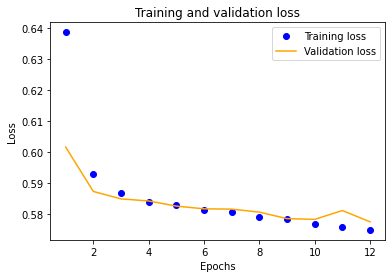

In [9]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.png')

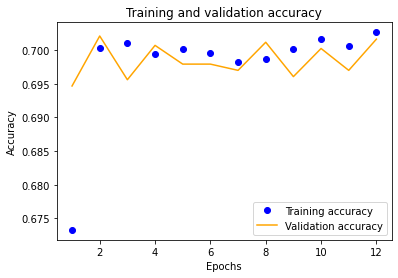

0.7020881772041321

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
np.max(val_acc)

In [11]:
model.predict(X_test) 
np.round(model.predict(X_test),0) 
preds = np.round(model.predict(X_test),0)
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)
print(classification_report(y_test, preds))

[[939 434]
 [328 992]]
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1373
           1       0.70      0.75      0.72      1320

    accuracy                           0.72      2693
   macro avg       0.72      0.72      0.72      2693
weighted avg       0.72      0.72      0.72      2693



In [26]:
predictionsFiles = np.round(model.predict(X_test),0)
#predictionsFiles=model.predict(X_test) 

In [27]:
pd.DataFrame(predictionsFiles).to_csv("predictionsFiles.csv",header='predict', index=False)

In [23]:
pd.DataFrame(y_test).to_csv("true.csv",header='true', index=False)